In [1]:
%load_ext lab_black

In [66]:
import requests, json, random
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from config import weather_api_key
from citipy import citipy
from sklearn.linear_model import LinearRegression
from scipy import stats
from datetime import date

In [64]:
# Build list of random coordinates

coordinate_list = []
counter = 0
number_of_points = 1200

while counter < number_of_points:
    lat = round(random.uniform(-90, 90), 6)
    lon = round(random.uniform(-180, 180), 6)
    counter += 1
    coordinate_list.append((lat, lon))

In [34]:
cities = []
city_count = 0

for coords in coordinate_list:
    city = citipy.nearest_city(coords[0], coords[1])
    if city.city_name not in cities:
        cities.append(city.city_name)
        city_count += 1

In [35]:
city_count

525

In [36]:
cities_results = []
count = 0
found_count = 0
not_found_count = 0

print("Beginning data retrieval:\n")
print(50 * "-")

for citi in cities:
    endpoint = "http://api.openweathermap.org/data/2.5/weather"
    payload = {"q": citi, "appid": weather_api_key, "units": "imperial"}

    r = requests.get(url=endpoint, params=payload)

    count += 1

    if r.status_code == 200:
        data = r.json()
        cities_results.append(data)
        print("Processing record: ", count, " | ", citi)
        found_count += 1
    else:
        print("Processing record: ", count, " | ", citi, " *Not Found*")
        not_found_count += 1

Beginning data retrieval:

--------------------------------------------------
Processing record:  1  |  chokurdakh
Processing record:  2  |  torbay
Processing record:  3  |  northam
Processing record:  4  |  constantine
Processing record:  5  |  tanshui  *Not Found*
Processing record:  6  |  hami
Processing record:  7  |  barentsburg  *Not Found*
Processing record:  8  |  bengkulu
Processing record:  9  |  monroe
Processing record:  10  |  samalaeulu  *Not Found*
Processing record:  11  |  ushuaia
Processing record:  12  |  cayenne
Processing record:  13  |  cidreira
Processing record:  14  |  saint-philippe
Processing record:  15  |  gbarnga
Processing record:  16  |  chuy
Processing record:  17  |  new norfolk
Processing record:  18  |  husavik
Processing record:  19  |  jiazi
Processing record:  20  |  cape town
Processing record:  21  |  pisco
Processing record:  22  |  carnarvon
Processing record:  23  |  manokwari
Processing record:  24  |  ukiah
Processing record:  25  |  mount 

In [37]:
r.status_code
# r.headers
# r.text
# r.json()

200

In [38]:
found_count

485

In [39]:
not_found_count

40

In [40]:
cities_results[0]
# 'weather' is a list of dicts, so not easily handled with pd.json_normalize()
# try manually unpacking as seen in class 9/17-1 at 35' mark

{'coord': {'lon': 147.92, 'lat': 70.63},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 40.6,
  'feels_like': 34.38,
  'temp_min': 40.6,
  'temp_max': 40.6,
  'pressure': 1025,
  'humidity': 82,
  'sea_level': 1025,
  'grnd_level': 1020},
 'visibility': 10000,
 'wind': {'speed': 5.68, 'deg': 293},
 'clouds': {'all': 100},
 'dt': 1600905480,
 'sys': {'country': 'RU', 'sunrise': 1600890949, 'sunset': 1600934696},
 'timezone': 39600,
 'id': 2126123,
 'name': 'Chokurdakh',
 'cod': 200}

In [41]:
city_data = []

for city in cities_results:
    city_data.append(
        {
            "City": city["name"],
            "Country": city["sys"]["country"],
            "Lat": city["coord"]["lat"],
            "Long": city["coord"]["lon"],
            "Temp_max": city["main"]["temp_max"],
            "Humidity": city["main"]["humidity"],
            "Cloudiness": city["clouds"]["all"],
            "Wind_Speed": city["wind"]["speed"],
        }
    )

city_table = pd.DataFrame(city_data)

In [42]:
city_table

,City,Country,Lat,Long,Temp_max,Humidity,Cloudiness,Wind_Speed
0,Chokurdakh,RU,70.63,147.92,40.60,82,100,5.68
1,Torbay,CA,47.67,-52.73,66.99,88,75,26.40
2,Northam,GB,51.03,-4.22,51.01,87,44,8.01
3,Constantine,DZ,36.37,6.61,68.00,60,52,1.12
4,Kumul,CN,42.80,93.45,64.08,31,98,2.77
...,...,...,...,...,...,...,...,...
480,Praxédis Guerrero,MX,31.37,-106.02,91.40,15,40,19.46
481,Marsá Maţrūḩ,EG,31.35,27.25,75.42,74,0,11.34
482,Osakarovka,KZ,50.56,72.57,41.31,84,53,21.61
483,Rocha,UY,-34.48,-54.33,50.23,91,99,4.47


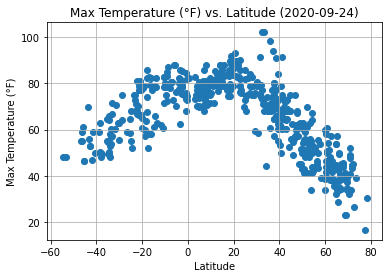

In [43]:
# Scatter plot of Temperature vs. Latitude
today = date.today()
x_values = city_table["Lat"]
y_values = city_table["Temp_max"]
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(axis="x")
plt.grid(axis="y")
plt.title(f"Max Temperature (°F) vs. Latitude ({today})")
plt.show()

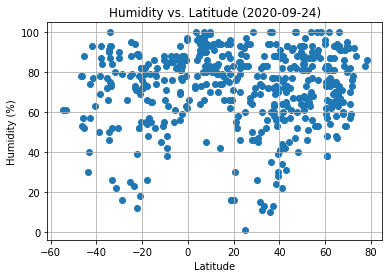

In [44]:
# Scatter plot of Humidity vs. Latitude
x_values = city_table["Lat"]
y_values = city_table["Humidity"]
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(axis="x")
plt.grid(axis="y")
plt.title(f"Humidity vs. Latitude ({today})")
plt.show()

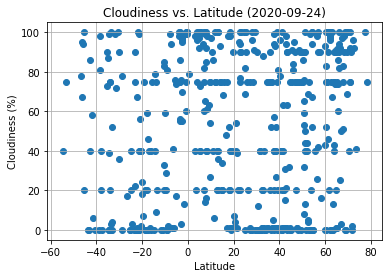

In [45]:
# Scatter plot of Cloudiness vs. Latitude
x_values = city_table["Lat"]
y_values = city_table["Cloudiness"]
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(axis="x")
plt.grid(axis="y")
plt.title(f"Cloudiness vs. Latitude ({today})")
plt.show()

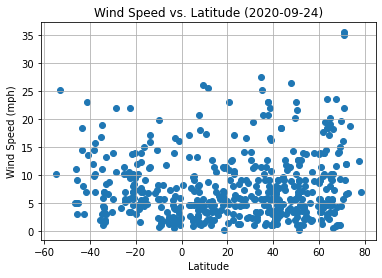

In [46]:
# Scatter plot of Wind Speed vs. Latitude
x_values = city_table["Lat"]
y_values = city_table["Wind_Speed"]
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(axis="x")
plt.grid(axis="y")
plt.title(f"Wind Speed vs. Latitude ({today})")
plt.show()

y = -0.71x + 91.63
The r-value is: 0.7054840095643237


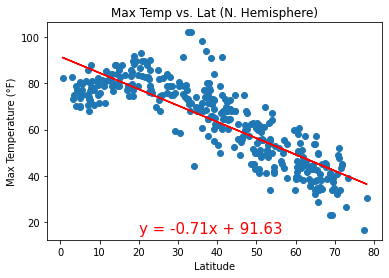

In [99]:
# Perform a linear regression on temperature vs. latitude for Northern Hemisphere
north_Lat_values = city_table.loc[city_table["Lat"] >= 0]["Lat"]
north_Temp_values = city_table.loc[city_table["Lat"] >= 0]["Temp_max"]

(N_slope, N_intercept, N_rvalue, N_pvalue, N_stderr) = stats.linregress(
    north_Lat_values, north_Temp_values
)

# Get regression values - N. Hemisphere
N_regress_values = north_Lat_values * N_slope + N_intercept

# Create line equation string - N. Hemisphere
N_line_eq = "y = " + str(round(N_slope, 2)) + "x + " + str(round(N_intercept, 2))
print(N_line_eq)

# Create Plot
plt.scatter(north_Lat_values, north_Temp_values)
plt.plot(north_Lat_values, N_regress_values, "r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.annotate(N_line_eq, (20, 15), fontsize=15, color="red")
plt.title("Max Temp vs. Lat (N. Hemisphere)")

# Print r value
print(f"The r-value is: {N_rvalue**2}")

# Show plot
plt.show()

y = 0.64x + 81.49
The r-value is: 0.5844869242027458


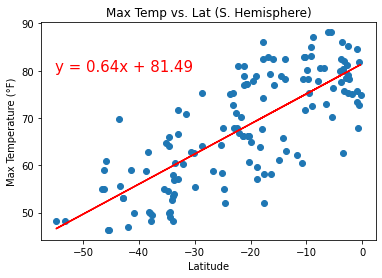

In [98]:
# Perform a linear regression on temperature vs. latitude for Southern Hemisphere
south_Lat_values = city_table.loc[city_table["Lat"] < 0]["Lat"]
south_Temp_values = city_table.loc[city_table["Lat"] < 0]["Temp_max"]

(S_slope, S_intercept, S_rvalue, S_pvalue, S_stderr) = stats.linregress(
    south_Lat_values, south_Temp_values
)

# Get regression values - S. Hemisphere
S_regress_values = south_Lat_values * S_slope + S_intercept

# Create line equation string - S. Hemisphere
S_line_eq = "y = " + str(round(S_slope, 2)) + "x + " + str(round(S_intercept, 2))
print(S_line_eq)

# Create Plot
plt.scatter(south_Lat_values, south_Temp_values)
plt.plot(south_Lat_values, S_regress_values, "r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.annotate(S_line_eq, (-55, 80), fontsize=15, color="red")
plt.title("Max Temp vs. Lat (S. Hemisphere)")

# Print r value
print(f"The r-value is: {S_rvalue**2}")

# Show plot
plt.show()